# Сборный проект

## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Цели проекта
Проверка гипотез:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<a id='оглавление'></a>
## Оглавление

* [Шаг 1. Общая информация о данных](#шаг1)
* [Шаг 2. Подготовка данных](#шаг2)
* [Шаг 3. Исследовательских анализ](#шаг3)
* [Шаг 4. Портрет пользователей](#шаг4)
* [Шаг 5. Проверка гипотез](#шаг5)
* [Шаг 6. Вывод](#шаг6)
___

[Оглавление](#оглавление)
<a id='шаг1'></a>
# Шаг 1. Общая информация о данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import re

pd.set_option("display.precision", 4)

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().mean()

Name               0.0001
Platform           0.0000
Year_of_Release    0.0161
Genre              0.0001
NA_sales           0.0000
EU_sales           0.0000
JP_sales           0.0000
Other_sales        0.0000
Critic_Score       0.5132
User_Score         0.4009
Rating             0.4048
dtype: float64

In [6]:
df[df.Name.isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


## Вывод:
Для многих игр нет данных о рейтинге/оценках.

[Оглавление](#оглавление)
<a id='шаг2'></a>
# Шаг 2. Подготовка данных
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
    * Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    * Опишите причины, которые могли привести к пропускам;
    * Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Переименую названия столбцов в нижний регистр:

In [7]:
df.columns = df.columns.str.lower()

В столбце `user_score` содержатся оценки пользователей от 0 до 10. Для игр, у которых мало отзывов, указано значение *tbd*. Заменю его на NaN, чтобы была возможность преобразовать признак к числовому типу.

In [8]:
df.loc[df.user_score == 'tbd', 'user_score'] = np.nan
df.user_score = df.user_score.astype('float')

___
Рассмотрим пропуски в признаках `name` u `genre`:

In [9]:
df[(df.name.isna() & df.genre.isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Думаю эти две строки можно удалить.

In [10]:
df = df.drop([659, 14244])

___
Преобразую признак `year_of_release` - год выхода игры - к типу datetime.

In [11]:
df.year_of_release = pd.to_datetime(df.year_of_release, format='%Y')

В данных есть пропуски, но я не буду их заполнять, так как на разных платформах игра может выходить в разные годы (ниже есть неполный список игр, релиз которых происходил в разные годы).

In [12]:
df.loc[df.name.str.contains('\d{4}', regex=True)].groupby('name')['year_of_release'].agg(['min', 'max']).query('min != max & min.isna() == False')

,min,max
name,,
Cool Boarders 2001,2000-01-01,2001-01-01
ESPN NFL Primetime 2002,2001-01-01,2002-01-01
ESPN Winter X Games: Snowboarding 2002,2000-01-01,2002-01-01
Farming Simulator 2013,2012-01-01,2013-01-01
Farming Simulator 2015,2014-01-01,2015-01-01
Jeremy McGrath Supercross 2000,1999-01-01,2000-01-01
Knockout Kings 2001,2000-01-01,2001-01-01
Madden NFL 2000,1998-01-01,1999-01-01
Mario & Sonic at the London 2012 Olympic Games,2011-01-01,2012-01-01


___
Добавлю столбец с суммарными продажами во всех регионах:

In [13]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null datetime64[ns]
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
total_sales        16713 non-null float64
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.7+ MB


## Вывод
* мы заменили названия столбцов
* решили не заполнять пропуски в данных
* добавили новый столбец с суммарными продажами

[Оглавление](#оглавление)
<a id='шаг3'></a>
# Шаг 3. Исследовательских анализ

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Рассмотрим сколько игр выпускалось в разные годы:

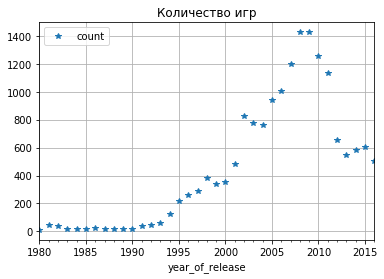

In [15]:
# games_per_year = df.groupby('year_of_release').name.agg(['count'])
# games_per_year.plot(style='*', grid=True)

df.groupby('year_of_release').name.agg(['count']).plot(style='*', grid=True)
plt.title('Количество игр')
plt.show()

На графике видно, что рост количества игр начался в 1994 году и достиг пика в 2006, после чего количество выпускаемых игр уменьшилось вдвое. Думаю для прогноза важны данные за период с 2012 года.
___
Рассмотрим как менялись продажи по платформам:

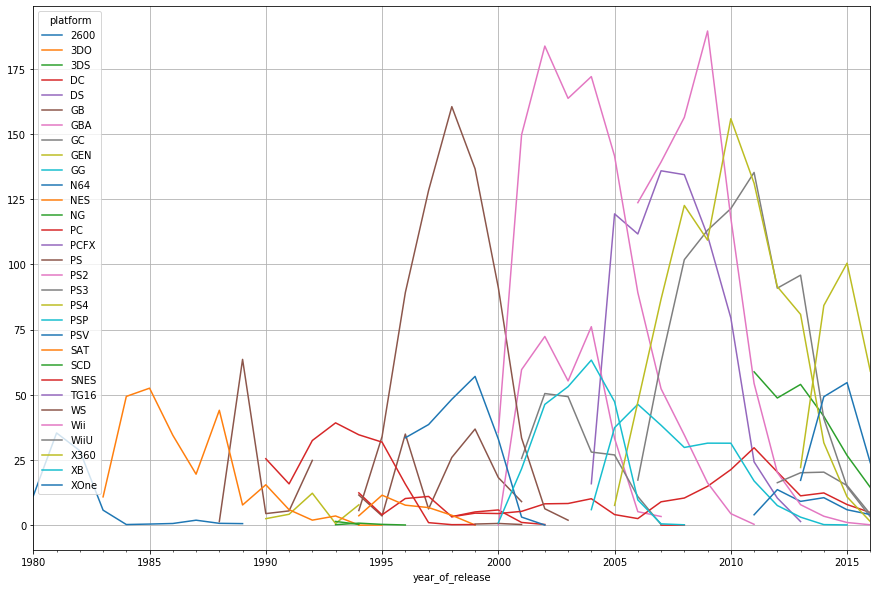

In [16]:
df.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot.line(figsize=(15,10), grid=True)
plt.show()

График красивый, но непонятный, потому что платформ слишком много. Попробуем выделить наиболее популярные платформы и рассмотреть их отдельно.

In [17]:
df.groupby('platform').total_sales.sum().sort_values(ascending=False)

platform
PS2     1062.33
X360     885.66
Wii      828.44
PS3      803.97
DS       746.86
PS       689.95
GBA      310.12
PS4      265.79
PSP      252.63
XB       249.02
GB       247.26
NES      245.74
3DS      245.64
PC       237.14
N64      214.30
SNES     196.82
GC       193.75
XOne     145.05
2600      96.07
WiiU      76.24
PSV       47.61
SAT       33.52
GEN       27.46
DC        15.68
SCD        1.81
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [18]:
df.groupby('platform').total_sales.sum().sort_values(ascending=False)[:6].index

Index(['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS'], dtype='object', name='platform')

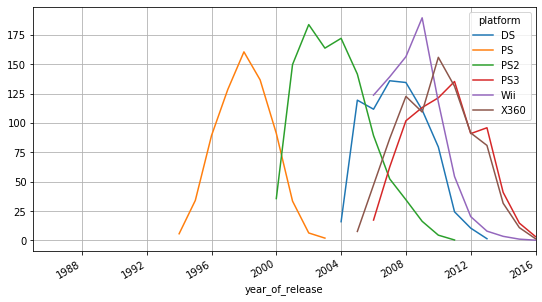

In [19]:
df.query("platform in ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS']").pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot.line(figsize=(9,5), grid=True)
plt.title('')
plt.show()

По графику видно, что наиболее популярные платформы появились во второй половине нулевых. Исключение составляют PS и PS2.
___
Теперь рассмотрим срок жизни платформы:

In [20]:
platform_live = df.groupby('platform').year_of_release.agg([np.min, np.max])
platform_live['diff_days'] = platform_live.amax - platform_live.amin
platform_live['diff_years'] = platform_live.diff_days.dt.days / 365 +1
platform_live['diff_years'] = platform_live['diff_years'].astype('int')
platform_live.sort_values(by='amin')

,amin,amax,diff_days,diff_years
platform,,,,
2600,1980-01-01,1989-01-01,3288 days,10
NES,1983-01-01,1994-01-01,4018 days,12
DS,1985-01-01,2013-01-01,10227 days,29
PC,1985-01-01,2016-01-01,11322 days,32
GB,1988-01-01,2001-01-01,4749 days,14
SNES,1990-01-01,1999-01-01,3287 days,10
GEN,1990-01-01,1994-01-01,1461 days,5
GG,1992-01-01,1992-01-01,0 days,1
SCD,1993-01-01,1994-01-01,365 days,2


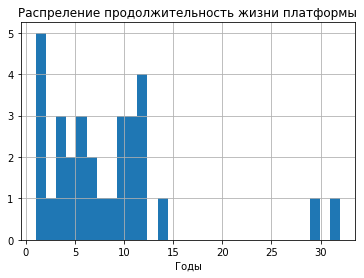

Средний срок жизни платформы 8.612903225806452
Медиана жизни платформы 7.0


In [21]:
platform_live.reset_index().diff_years.hist(bins=30)
plt.title('Распреление продолжительность жизни платформы')
plt.xlabel('Годы')
plt.show()
print(f'Средний срок жизни платформы {platform_live.diff_years.mean()}\nМедиана жизни платформы {platform_live.diff_years.median()}')

Есть пики для значений 1 и 12 лет.

___
В дальнейшем исследовании будем рассматривать данные за 2012-2015 годы. 2016 год рассматривать не будем, так как данные могут быть неполными.


Определим лидеров по продажам и направление линии тренда для них:

In [22]:
df_act = df.query('year_of_release > 2011 & year_of_release < 2016')
df_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2384 entries, 16 to 16707
Data columns (total 12 columns):
name               2384 non-null object
platform           2384 non-null object
year_of_release    2384 non-null datetime64[ns]
genre              2384 non-null object
na_sales           2384 non-null float64
eu_sales           2384 non-null float64
jp_sales           2384 non-null float64
other_sales        2384 non-null float64
critic_score       1080 non-null float64
user_score         1269 non-null float64
rating             1331 non-null object
total_sales        2384 non-null float64
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 242.1+ KB


platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012-01-01,48.77,10.42,20.41,90.87,NaN,7.56,13.65,20.22,16.30,91.45,NaN
2013-01-01,53.97,1.42,11.27,95.85,22.12,3.10,9.14,7.87,20.12,80.82,17.21
2014-01-01,41.75,NaN,12.38,40.88,84.22,0.24,10.56,3.45,20.35,31.61,49.26
2015-01-01,26.75,NaN,7.93,14.70,100.44,0.12,5.93,1.05,15.22,10.86,54.67


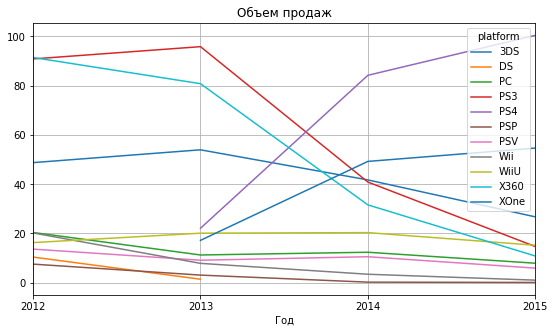

In [23]:
display(df_act.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum'))
df_act.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot.line(figsize=(9,5), grid=True)
plt.title('Объем продаж')
plt.xlabel('Год')
plt.show()

Лидерами являются 3DS, PS4, XOne. По графику видно, что продажи увеличиваются для PS4, XOne. Для остальных платформ объем продаж уменьшается.

Потенциально прибыльными платформами считаю PS4, XOne.
___
Теперь рассмотрим распределение общих продаж для платформ по годам. Отдельно рассмотрим распределение для PS4, XOne:

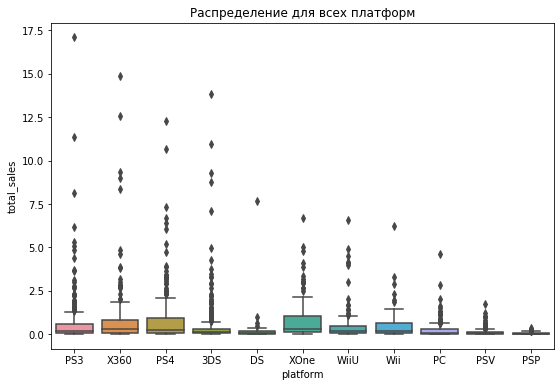

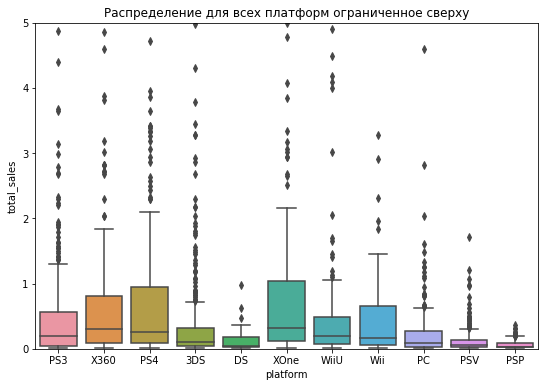

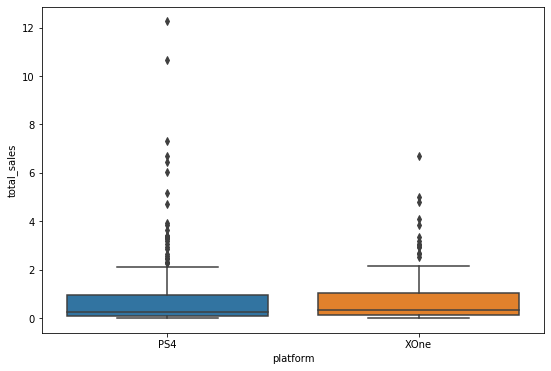

In [24]:
plt.figure(figsize=(9,6))
sns.boxplot(data = df_act, x = 'platform', y = 'total_sales')
plt.title('Распределение для всех платформ')
plt.show()

plt.figure(figsize=(9,6))
sns.boxplot(data = df_act, x = 'platform', y = 'total_sales')
plt.ylim(0, 5)
plt.title('Распределение для всех платформ ограниченное сверху')
plt.show()

plt.figure(figsize=(9,6))
sns.boxplot(data = df_act.query('platform in ["PS4", "XOne"]'), x = 'platform', y = 'total_sales')
plt.show()

___

    Выбросы скорее всего связаны с эксклюзивами для платформ или AAA проектами (которые выходят в основном для PC и последнего поколения ps, xbox). ААА проектами также можно объяснить высокие продажи для линеек PlayStation u xbox. PC нет в топе по продажам, потому что пользователи могут заниматься пиратством. Nintendo DS, 3DS и PSVita, PSP отстают по продажам потому, что являются портативными консолями, а с выходом смартфонов они потеряли свою актуальность.
 


____
По графикам выше можно сделать следующие выводы:
* Данные имеют вид распределения Пуассона.
* В данных часто встречаются выбросы, наиболее значительные выбросы у платформ PS3, X360, PS4, 3DS.
* Наибольшее среднее значение объема продаж у X360, PS4, XOne.
* Средний объем продаж выше у XOne, но более значительные выбросы у PS4.

___
Рассмотрим как влияют отзывы пользователей и критиков на продажи игр. Построим диаграмму рассеяния: 

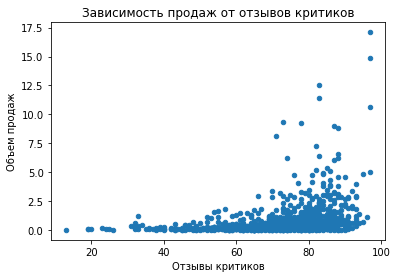

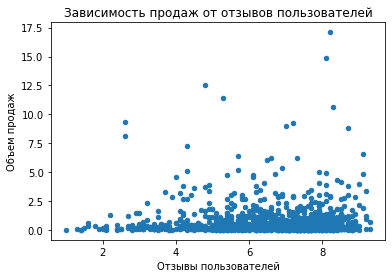

In [26]:
df_act.plot.scatter(y = 'total_sales', x = 'critic_score')
plt.title('Зависимость продаж от отзывов критиков')
plt.xlabel('Отзывы критиков')
plt.ylabel('Объем продаж')
plt.show()

df_act.plot.scatter(y = 'total_sales', x = 'user_score')
plt.title('Зависимость продаж от отзывов пользователей')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Объем продаж')
plt.show()

По графикам видно, что с увеличением оценки растет объем продаж. Для отзывов критиков эта зависимость выражена сильнее. Рассчитаем коррелицию:

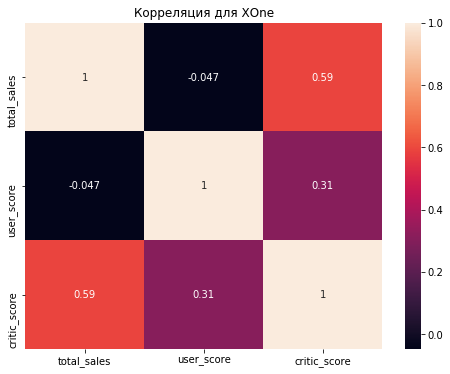

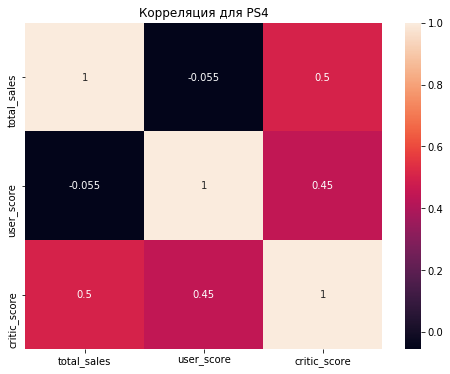

In [27]:
for platform in ['XOne', 'PS4']:
    plt.figure(figsize=(8,6))
    sns.heatmap(df_act.loc[df_act.platform == platform, ['total_sales', 'user_score', 'critic_score']].corr(method='spearman'),annot=True)
    plt.title(f'Корреляция для {platform}')
    plt.show()

Как видно, оценка критиков влияет на продажы и связана с оценкой пользователей, а оценка пользователей практически не влияет на продажи. Для двух наиболее популярных платфорт значения корреляции очень близки.
___
Теперь рассмотрим влияние жанров на продажи:

In [28]:
df_act.groupby('genre').total_sales.sum().sort_values(ascending=False)

genre
Action          362.94
Shooter         234.27
Role-Playing    161.19
Sports          138.16
Misc             74.91
Platform         52.63
Racing           44.50
Fighting         36.09
Simulation       31.17
Adventure        23.17
Strategy         11.22
Puzzle            4.66
Name: total_sales, dtype: float64

Наиболее продаваемые жанры: *Action, Shooter, Role-Playing, Sports*

## Вывод:
1. Интересный для нас период - 2012-2015 годы.
2. Самые полулярные платформы PS4 u XOne
3. Средний срок жизни платформы 7-9 лет
4. На продажи влияют оценки критиков, а не пользователей
5. Наиболее популярные жанры: *Action, Shooter, Role-Playing, Sports*

[Оглавление](#оглавление)
<a id='шаг4'></a>
# Шаг 4. Портрет пользователей
Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?
___

Определим популярные платформы для разных регионов для периода 2012-2015 гг:

,na_sales,eu_sales,jp_sales
X360,25.52%,16.20%,nan%
PS3,18.81%,23.18%,19.62%
PS4,15.98%,23.99%,nan%
XOne,14.44%,9.21%,nan%
3DS,9.37%,8.85%,46.03%
PSV,nan%,nan%,10.09%
WiiU,nan%,nan%,7.12%
PSP,nan%,nan%,6.04%


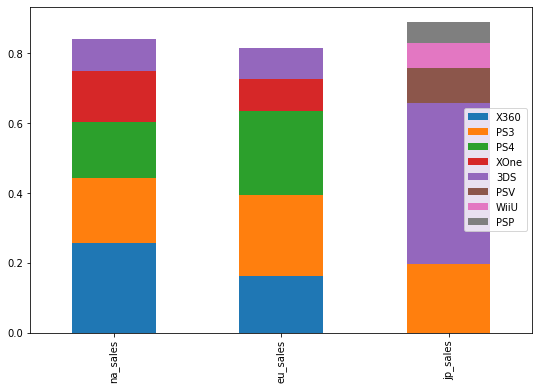

In [29]:
l_sales = ['na_sales', 'eu_sales', 'jp_sales']

def find_top5(atr):
    top_five = pd.DataFrame()
    for param in l_sales:
        top_five = pd.concat([top_five, df_act.groupby(atr)[param].sum().sort_values(ascending = False)[:5] / df_act[param].sum()], axis=1, sort=False)

    display(top_five.style.format('{:.2%}'))
    top_five.T.plot(kind='bar', stacked=True, figsize=(9,6))
find_top5('platform')

1. В Европе и Америки предпочтения к игровым платформам совпадают, но в Америке большей популярностью пользуется линейка Xbox, а в Европе PlayStation.
2. PS3 во всех регионах занимает около 20% рынка.
3. 3DS также входит в ТОП5 во всех регионах, но в Японии она занимает 50% рынка, а в остальных около 9%
4. В Японии предпочитают портативные консоли, а в Америке и Европе отдают предпочтения крупноразмерным.
___
Теперь рассмотрим жанры:

,na_sales,eu_sales,jp_sales
Action,30.87%,32.63%,26.39%
Shooter,23.54%,21.42%,nan%
Sports,13.55%,12.53%,nan%
Role-Playing,10.64%,9.71%,33.95%
Misc,6.85%,5.63%,6.82%
Simulation,nan%,nan%,5.82%
Fighting,nan%,nan%,5.02%


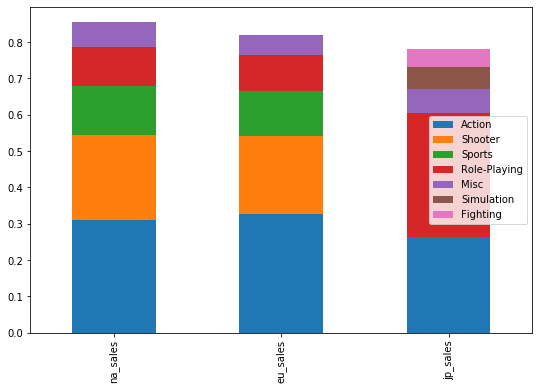

In [30]:
find_top5('genre')

1. *Action, Role-Playing и Misc* популярны во всех регионах
2. В Америке и Европе популярны *Shooter и Sports*, которые не входят в ТОП5 Японии. Возможно в эти жанры неудобно играть на маленьких дисплеях портативных консолей. Зато в Японии популярны *Simulation и Fighting*, которые не входят в ТОП5 других регионов.

,na_sales,eu_sales,jp_sales
M,39.54%,38.94%,11.54%
E,19.49%,21.82%,15.73%
Без рейтинга,17.36%,18.44%,54.55%
E10+,13.17%,11.32%,4.47%
T,10.45%,9.48%,13.71%


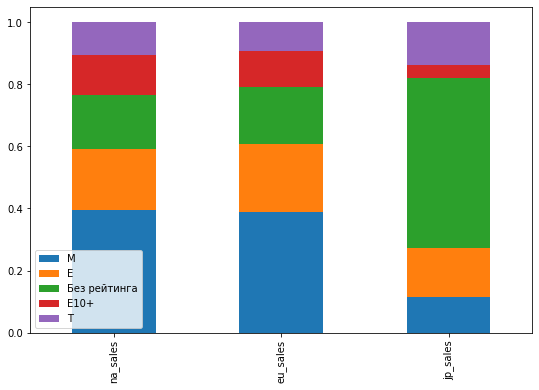

In [32]:
top_five = pd.DataFrame()
for param in l_sales:
    top_five = pd.concat([top_five, df_act.fillna('Без рейтинга').groupby('rating')[param].sum().sort_values(ascending = False)[:5] / df_act[param].sum()], axis=1, sort=False)
top_five.T.plot(kind='bar', stacked=True, figsize=(9,6))
display(top_five.style.format('{:.2%}'))

1. В Америке и Европе наиболее популярен рейтинг "для взрослых", а в Японии - "для всех".
2. В Японии около 55% игр с рейтингом NaN, для остальных регионов этот показатель около 20%. Это может говорить о том, что для Японии делают игры, которые непопулярны в других регионах.

[Оглавление](#оглавление)
<a id='шаг5'></a>
# Шаг 5. Проверка гипотез

Необходимо проверить две гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
___
Сначала проверим гипотезу о Xbox One и PC:
- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

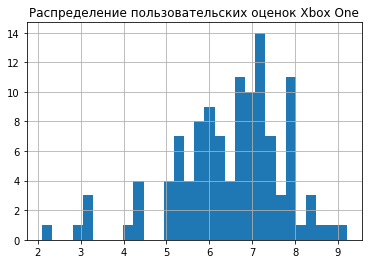

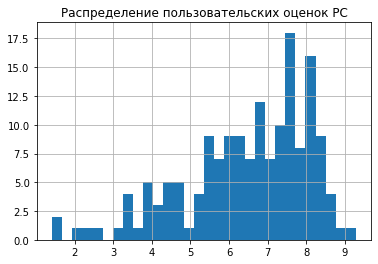

,mean,median,std
platform,,,
PC,6.4652,6.8,1.6465
XOne,6.4776,6.7,1.2882


In [33]:
df_act.query('platform == "XOne" & user_score.isna()==False').user_score.hist(bins=30)
plt.title('Распределение пользовательских оценок Xbox One')
plt.show()

df_act.query('platform == "PC" & user_score.isna()==False').user_score.hist(bins=30)
plt.title('Распределение пользовательских оценок PC')
plt.show()

df_act.query('platform in ["XOne", "PC"]').groupby('platform').user_score.agg(['mean', 'median', 'std'])

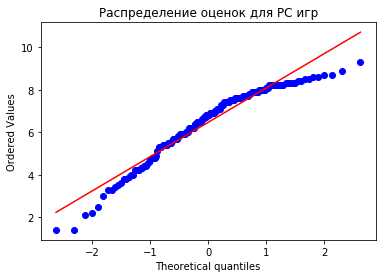

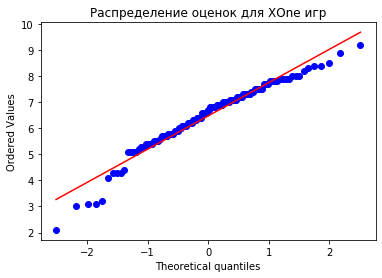

In [34]:
import pylab

stats.probplot(df_act.query('platform == "PC" & user_score.isna()==False').user_score, dist="norm", plot=pylab)
plt.title('Распределение оценок для PC игр')
plt.show()

stats.probplot(df_act.query('platform == "XOne"& user_score.isna()==False').user_score, dist="norm", plot=pylab)
plt.title('Распределение оценок для XOne игр')
plt.show()

Так как распределение не соответсвует нормальному, для проверки гипотизы о равенстве средних буду использовать критерий Манна-Уитни

In [35]:
stat, p = stats.mannwhitneyu(df_act.query('platform == "XOne" & user_score.isna()==False').user_score, df_act.query('platform == "PC" & user_score.isna()==False').user_score)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

Statistics=8832.000, p=0.221
Не получилось отвергнуть нулевую гипотезу


Так как нулевую гипотезу отвергнуть не удалось, средние пользовательские рейтинги платформ Xbox One и PC одинаковые
___

Теперь рассмотрим средние пользовательские рейтинги жанров Action и Sports.
- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1: Средние пользовательские рейтинги жанров Action и Sports не одинаковые

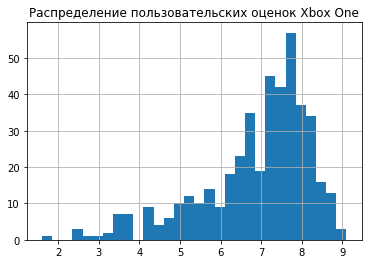

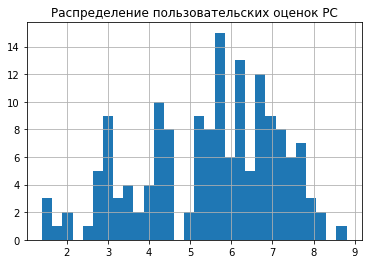

,mean,median,std
genre,,,
Action,6.8612,7.2,1.3534
Sports,5.4614,5.7,1.6674


In [36]:
df_act.query('genre == "Action"').user_score.hist(bins=30)
plt.title('Распределение пользовательских оценок Xbox One')
plt.show()

df_act.query('genre == "Sports"').user_score.hist(bins=30)
plt.title('Распределение пользовательских оценок PC')
plt.show()

df_act.query('genre in ["Action", "Sports"]').groupby('genre').user_score.agg(['mean', 'median', 'std'])

Для проверки этой гипотезы тоже будем использовать критерий Манна-Уитни 

In [37]:
stat, p = stats.mannwhitneyu(df_act.query('genre == "Action" & user_score.isna()==False').user_score, df_act.query('genre == "Sports" & user_score.isna()==False').user_score)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

Statistics=17038.000, p=0.000
Отвергаем нулевую гипотезу


Так как мы отвергли нулевую гипотезу, средние пользовательские рейтинги у жанров Action и Sports разные.
___
## Вывод:
1. средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. средние пользовательские рейтинги у жанров Action и Sports разные

[Оглавление](#оглавление)
<a id='шаг6'></a>
# Шаг 6. Вывод

В ходе работы мы определили, что
* наиболее актуальный период для анализа 2012-2015 годы
* наибольшей популярностью сейчас пользуются PS4 и XOne
* объем продаж игры связан с оценкой критиков, но не пользователей
* в Японии популярны портативные консоли, а в Америке и Европе крупные. Это может влиять на предпочтения в жанрах, но везде популярен Action
* в Америке и Европе популярнее игры с рейтингом "для взрослых", а в Японии большинству игр не присвоен рейтинг
* подтвердили гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* подтвердили гипотезу, что средние пользовательские рейтинги у жанров Action и Sports разные